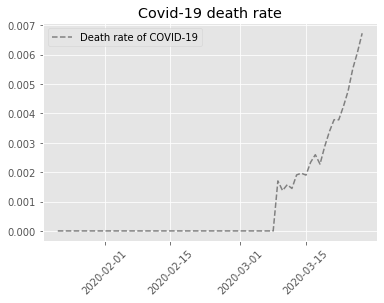

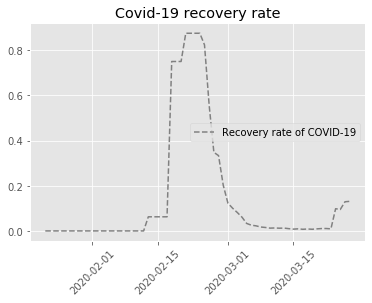

In [1]:
"""
covid-19 هذاتحليل لحالة
in GERMANY
استناداً إلى البيانات المتاحة من جامعة جونز هوبكنز

MIT licensed by Ayoub Malek
"""
import warnings
import datetime
import matplotlib
import pandas as pd
from sirfit import SirFit
import matplotlib.pyplot as plt
from covid_world import CovidWorld
from covid_country import CovidCountry


# hide warnings
warnings.filterwarnings("ignore") 

# set style
matplotlib.rcParams.update({'font.size': 9})
plt.style.use('ggplot')

# Country
de = CovidCountry(country="Germany")
de.parse_data()

# death and recovery rates
de.compute_death_rate(smooth=False, plot=True, title="Covid-19 death rate")
de.compute_recovery_rate(smooth=False, plot=True, title="Covid-19 recovery rate")

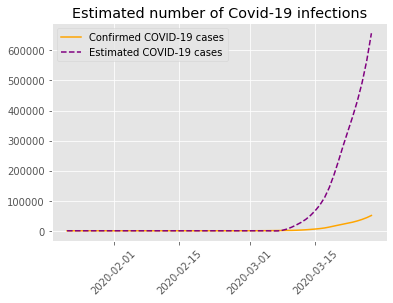

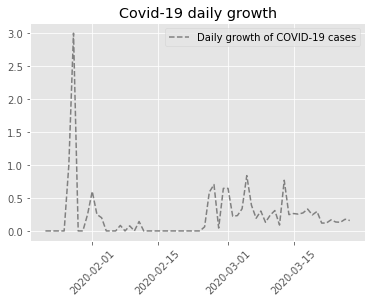

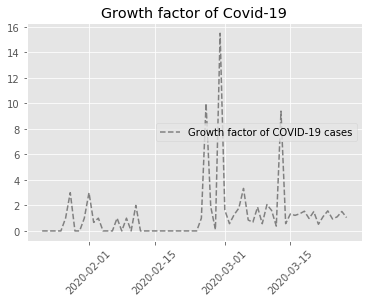

In [2]:
# infections estimations and growth
de.compute_estimations(smooth=True, plot=True, title="Estimated number of Covid-19 infections")
de.compute_daily_growth(smooth=False, plot=True, title="Covid-19 daily growth")
de.compute_growth_factor(smooth=False, plot=True, title="Growth factor of Covid-19")

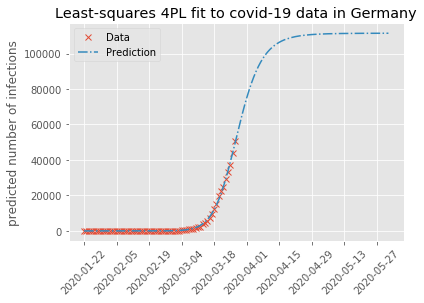

In [6]:
# modelling and fits
# logistic curve model
de.logisitc_fit(p0=[0, 1, 1, 1], plot=True, title='Least-squares 4PL fit to covid-19 data in Germany')
plt.show()

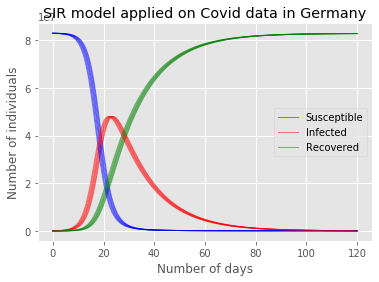

In [7]:
# SIR model
ij = list(zip(de.covid_df.confirmed_cases.values, de.covid_df.recovered_cases.values))
for i, j in ij[-7:]:
    sf = SirFit(total_population=83000000, I0=i, R0=j, 
                contract_rate=.5, recovery_rate=1/14,
                number_of_days=120)
    t, S, I, R = sf.fit()
    sf.plot_fit(t, S, I, R, title="SIR model applied on Covid data in Germany")
plt.show()